# Clothes

### Data Format: (examples, features)
* Input (60000, 28, 28)
* Output (60000,)
* X_train  -- (60000,28,28)
* X_test  -- (10000,28,28)
* Y_train  -- (60000,)
* Y_test  -- (10000,)


### Model

* Flatten(28x28) > 128 > 10

### Results

* Test Accuracy: 87%

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

C:\Users\abido\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
p = print
p(tf.__version__)

1.8.0


### Loading the dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Preprocessing

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

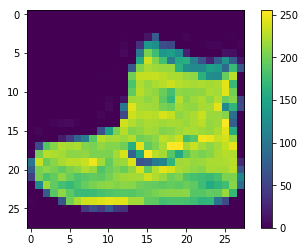

In [6]:
# Example
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


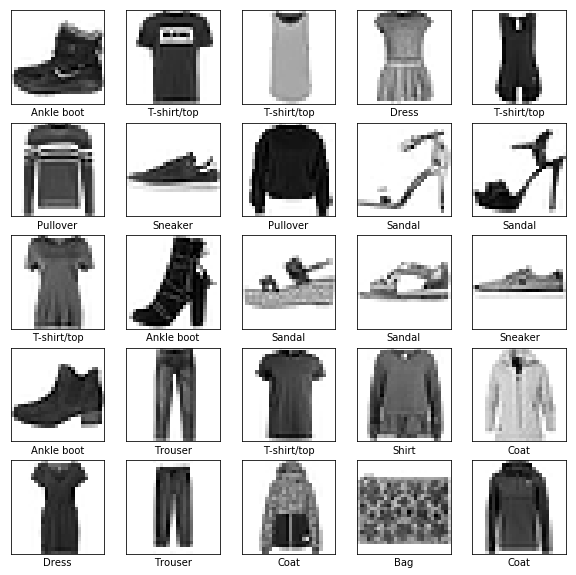

In [9]:
# display some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### Model

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.4930 - acc: 0.8251
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3709 - acc: 0.8664
Epoch 3/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.3369 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3118 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2929 - acc: 0.8921


### Results

In [13]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
p('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/step
Test accuracy: 0.8763


In [14]:
# Make predictions
predictions = model.predict(test_images)
p(predictions[0])
p(np.argmax(predictions[0]))
p(test_labels[0])

[3.2249834e-05 7.6314741e-08 1.4554865e-05 3.9810922e-05 1.1657154e-04
 6.6047406e-04 8.4156527e-05 7.3532000e-02 2.0245864e-04 9.2531765e-01]
9
9


In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

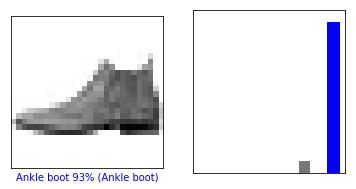

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

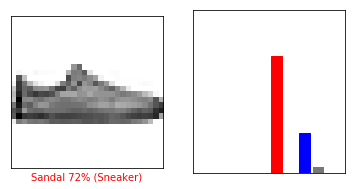

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

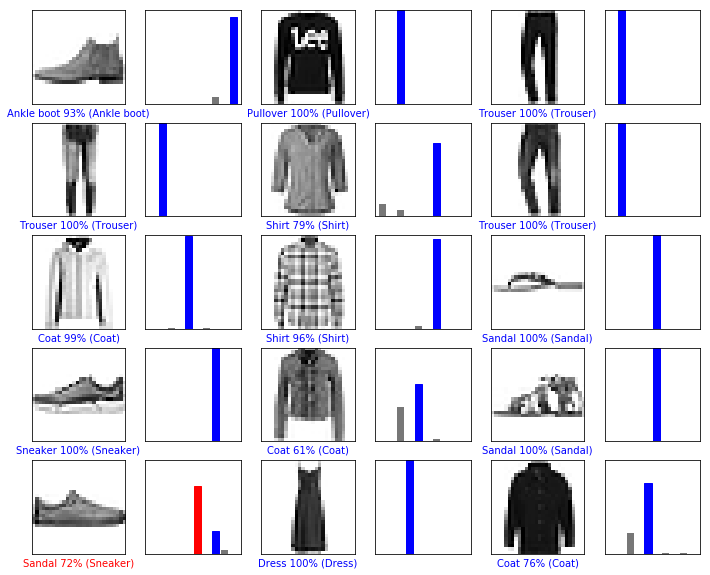

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

(28, 28)
(1, 28, 28)
[[3.22498345e-05 7.63145991e-08 1.45548793e-05 3.98110024e-05
  1.16571304e-04 6.60474354e-04 8.41565270e-05 7.35320225e-02
  2.02458454e-04 9.25317645e-01]]


9

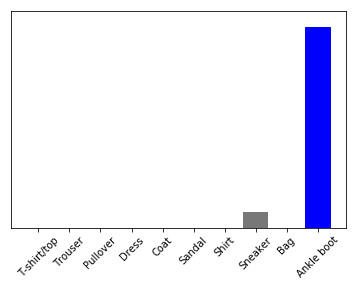

In [21]:
## Single Prediction
img = test_images[0]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])